# 1. pytorch 2.x으로 설치하기


실습하기에 앞서 파이토치 2.x으로 설치 필요!   
Colab에서는 바로 사용할 수 있다.

https://pytorch.org/examples/

In [2]:
import torch

torch.__version__

'2.0.1+cu118'

In [5]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [6]:
device

device(type='cuda', index=0)

파이토치는 cpu, gpu 모두 사용할 수 있으며,  
colab의 경우 기본적으로 gpu가 설치된 버전으로 사용이 가능  
torch 버전을 출력해보면 나오는 버전+환경을 통해 확인이 가능하다.

In [7]:
# pytorch에서 사용할 함수들 호출하기
import numpy as np
import torch.nn as nn   # Neural Network -> 모델을 직접 구성할 경우 import
import torch.nn.functional as F # Loss와 같은 Functional 함수들
import torch.optim as optim # optimizer
from torchvision import datasets, transforms    # 데이터셋, 변형
from torch.optim.lr_scheduler import StepLR # StepLearningRate - 스케줄러 -> optimizer 보조 역할

먼저, datasets안에 들어있는 몇 가지 예제 데이터들 중에,  
mnist 데이터를 사용해보겠습니다.

In [8]:
train_dataset = datasets.MNIST('./data', train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 80787891.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 8214817.16it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21021010.39it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4102181.04it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [9]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

pytorch 데이터셋의 경우 PIL.Image와 라벨로 이루어져 있다

In [10]:
len(train_dataset)

60000

In [11]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7DDC47B52200>, 5)

In [12]:
train_dataset[0][0]

In [13]:
unique_class = np.unique([label for img, label in train_dataset])
print(unique_class)
len(unique_class)

[0 1 2 3 4 5 6 7 8 9]


10

지금은 이미지로 보이지만, 컴퓨터를 학습시키기 위해선 숫자로 바꿔주는 과정이 필요하다.

In [14]:
transform = transforms.Compose([
        transforms.ToTensor(), # 이미지를 tensor 자료형(숫자)으로 변경
        transforms.Normalize((0.1307,), (0.3081,)) # 정규화
        ])

train_dataset.transform = transform

In [15]:
train_dataset[0][0]

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

기본적으로 이미지를 tensor 자료형으로 변경할 경우  
한 이미지는 이미지 채널 수 (Gray or RGB), width, height 순의 배열로 나타난다.

In [16]:
train_dataset[0][0].shape   # Gray - 1, RGB - 3

torch.Size([1, 28, 28])

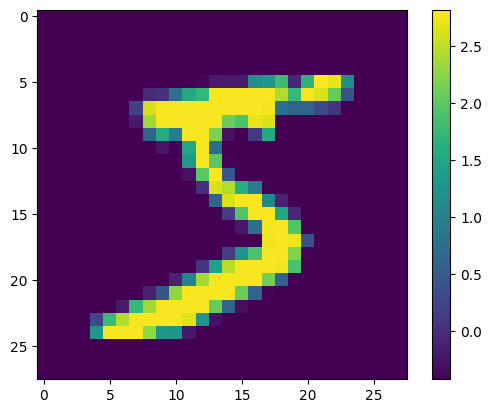

In [17]:
import matplotlib.pyplot as plt

plt.figure()
# plt.imshow(train_dataset[0][0].reshape(28, 28, 1)) # width, height, color channels
plt.imshow(train_dataset[0][0].permute(1, 2, 0))    # width, height, color channels에 해당하는 index
plt.colorbar()
plt.show()

pytorch의 데이터를 학습시키기 위해선 DataLoader로 바꿔주는 과정이 필요하다.  
참고로 dataset의 경우 데이터, 라벨로 이루어져 있어야 하고 iterable해야한다.

In [18]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)  # batch_size: 한 번에 학습시킬 데이터 개수

In [19]:
train_dataset[0][1], train_dataset[0][0]

(5,
 tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0

In [21]:
for image, label in train_loader:
    print(image.shape)  # ([batch_size, color_channels, width, height])
    print(label.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


# 숫자 이미지 예측하기

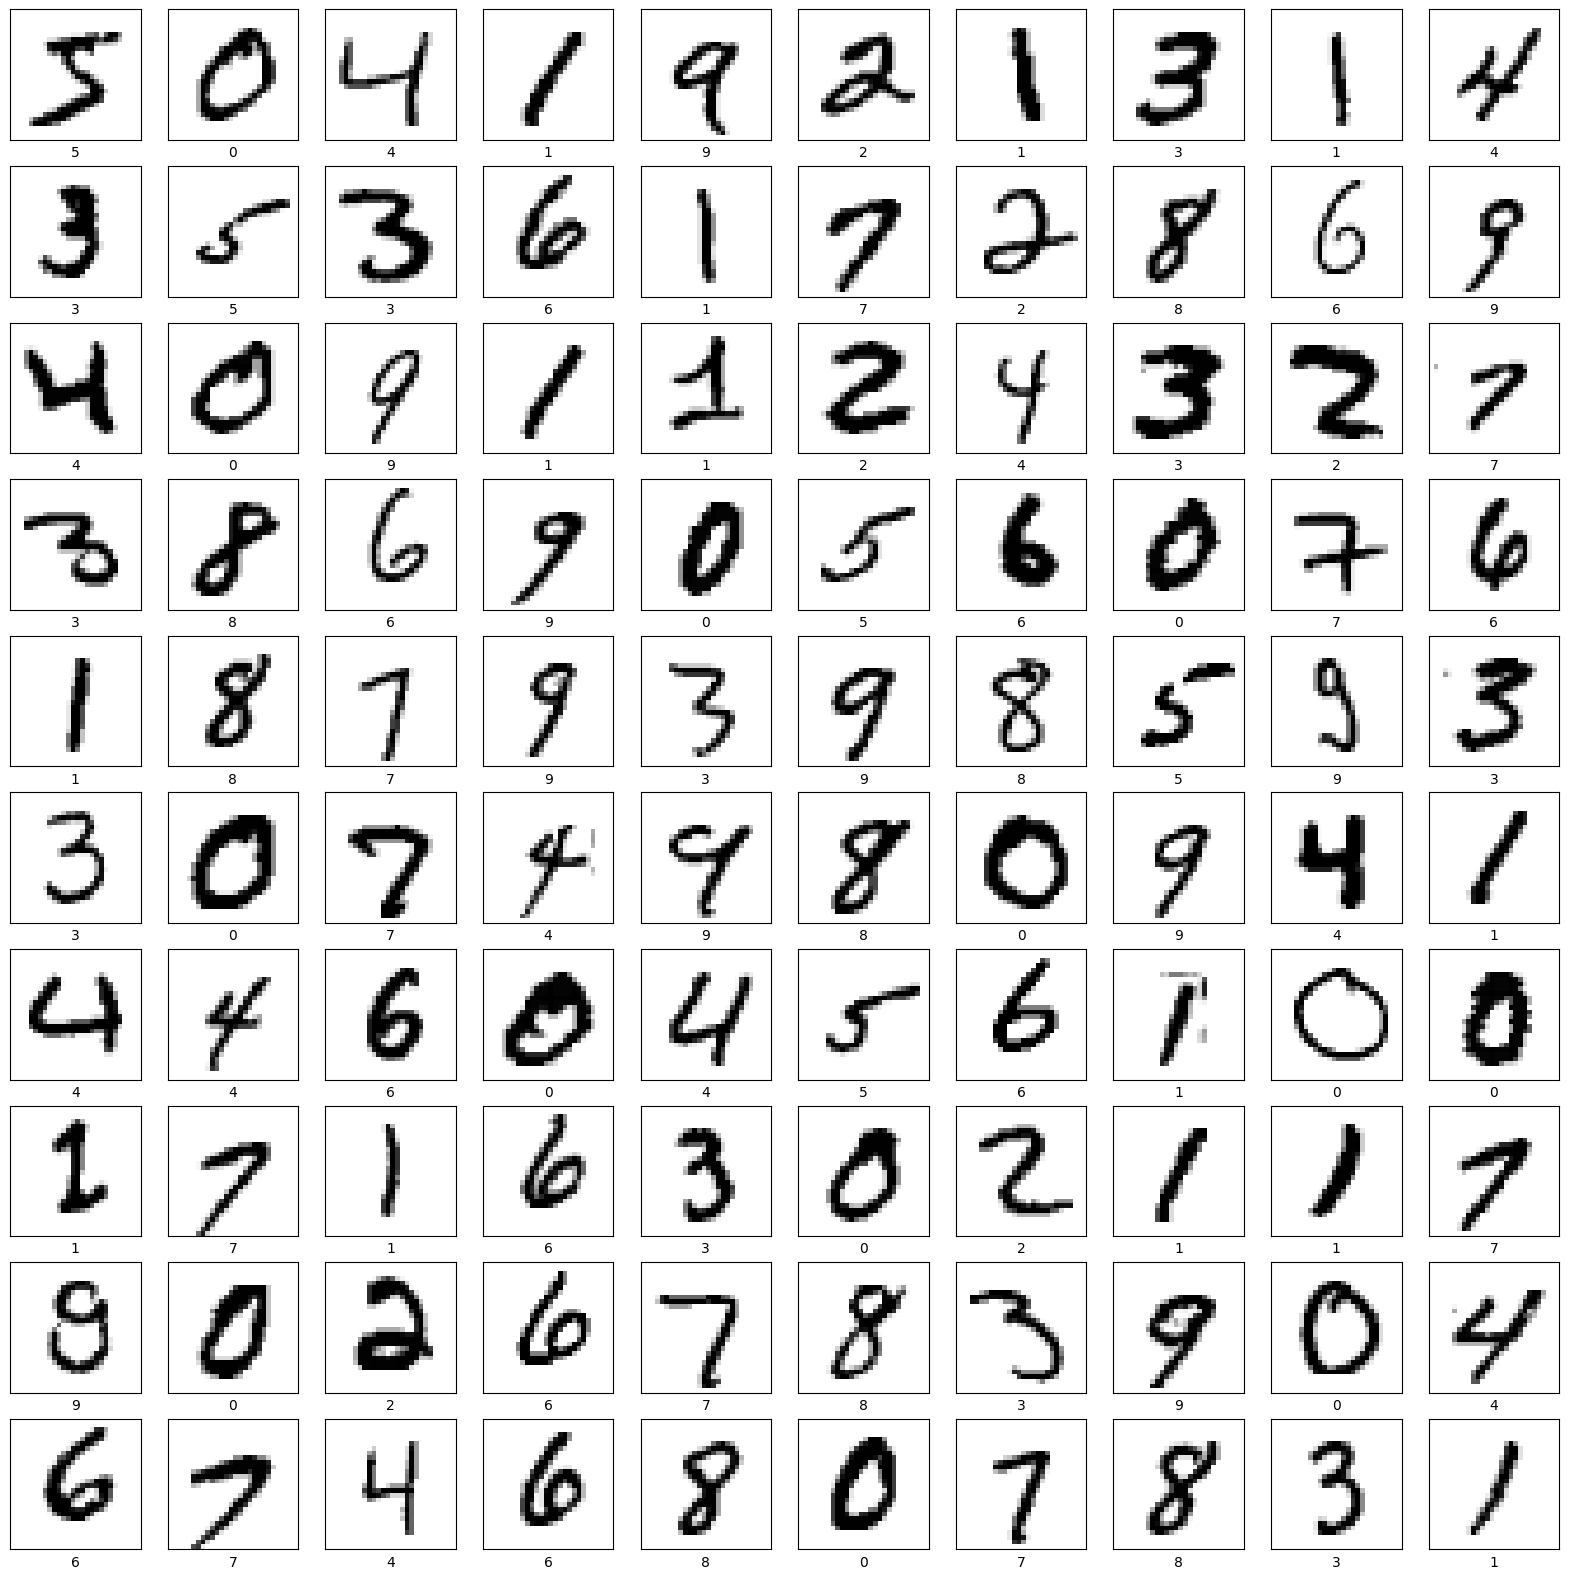

In [22]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_dataset[i][0].reshape(28, 28, 1), cmap=plt.cm.binary)
    plt.xlabel(train_dataset[i][1])
plt.show()

테스트 데이터 정의

In [24]:
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
# test_dataset.transform = transform
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

### 모델 구축

In [25]:
# 기본 모델 = 완전연결계층 = Linear
class MyFirstModel(nn.Module):
    def __init__(self, num_classes=10):
        super(MyFirstModel, self).__init__()

        self.model = nn.Sequential(     # 일련의 neural network 순차적 실행 (feed forward)
            nn.Flatten(),               # (1, 28, 28) -> (784, )
            nn.Linear(784, 512),        # Input data feature 개수가 784(28x28)개, 노드 개수가 512개인 퍼셉트론
            nn.ReLU(),                  # 활성화 함수
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            # nn.Linear(256, 256),
            # nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes),         # y 클래스 개수 = 10
            nn.Softmax()                # 확률값 합이 1이 되도록 activation function 수행   선형이면 Linear, 이항이면 Binary, 다항이면 Softmax
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [26]:
model = MyFirstModel()

### 모델 컴파일
모델을 훈련하기 전에 필요한 몇 가지 설정이 필요합니다.:

모델을 device로 이동 - 훈련 시 모델을 cpu, gpu로 이동시킵니다.  
옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.  
스케줄러(Scheduler)-학습률을 학습이 진행됨에 따라 적절한 값으로 변경하기 위해 사용합니다.


In [27]:
model.parameters

<bound method Module.parameters of MyFirstModel(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=256, bias=True)
    (6): ReLU()
    (7): Linear(in_features=256, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
    (10): Softmax(dim=None)
  )
)>

In [28]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

optimizer = optim.Adadelta(model.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)   # next lr = 1.0 * 0.7 = 0.7

### 모델 훈련
신경망 모델을 훈련하는 단계는 다음과 같습니다:  
.  
model을 학습 상태로 변경합니다. (가중치 업데이트 가능한 상태)  
dataloader에서 뽑은 배치 사이즈만큼의 훈련 데이터를 device로 이동시킵니다.  

훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.  
모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.  

테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다.  
이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.  

Epoch : dataset 반복 횟수  
예를 들어,  
책 몇번 봤어? == 책 몇 epoch 돌렸어?  


손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다.  
모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.  

In [37]:
# pytorch에서 전형적인 학습 방법이므로 코드에 익숙해지자.
epochs = 10
dry_run = False # 1 배치만 훈련

for epoch in range(1, epochs+1):
    # 학습
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        # print('input data의 형태', data.shape)
        # print('target data의 형태', target.shape)
        optimizer.zero_grad()       # w -= learning * gradient -> 기울기 0으로 초기화 (이전 기울기 누적 방지용)
        output = model(data)        # forward 함수 실행 (model.forward(data))
        # print('output data의 형태', output.shape)
        loss = F.nll_loss(output, target)
        loss.backward()             # back propagation
        optimizer.step()            # weight update
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break


    # 테스트
    model.eval()
    test_loss = 0
    correct = 0

    print('\n\n 테스트')
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        with torch.no_grad():       # 기울기를 계산하지 않게 한다.
            output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
        # output shape = (32, 10)
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        # print('예측 라벨')
        # print(pred)
        # print(pred.shape)
        # print((pred == target.reshape(-1, 1)).sum())
        correct += pred.eq(target.view_as(pred)).sum().item()       # pred == target

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    if dry_run:
        break
    scheduler.step()    # learning rate * gamma (epoch마다 learning rate에 0.7씩 곱해준다.)

Train Epoch: 1 [0/60000 (0%)]	Loss: -0.937499
Train Epoch: 1 [3200/60000 (5%)]	Loss: -0.999894
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.968749
Train Epoch: 1 [9600/60000 (16%)]	Loss: -0.999992
Train Epoch: 1 [12800/60000 (21%)]	Loss: -0.999999
Train Epoch: 1 [16000/60000 (27%)]	Loss: -1.000000
Train Epoch: 1 [19200/60000 (32%)]	Loss: -0.906250
Train Epoch: 1 [22400/60000 (37%)]	Loss: -0.968749
Train Epoch: 1 [25600/60000 (43%)]	Loss: -0.968750
Train Epoch: 1 [28800/60000 (48%)]	Loss: -0.937500
Train Epoch: 1 [32000/60000 (53%)]	Loss: -1.000000
Train Epoch: 1 [35200/60000 (59%)]	Loss: -0.999999
Train Epoch: 1 [38400/60000 (64%)]	Loss: -0.968750
Train Epoch: 1 [41600/60000 (69%)]	Loss: -0.968750
Train Epoch: 1 [44800/60000 (75%)]	Loss: -0.968743
Train Epoch: 1 [48000/60000 (80%)]	Loss: -1.000000
Train Epoch: 1 [51200/60000 (85%)]	Loss: -1.000000
Train Epoch: 1 [54400/60000 (91%)]	Loss: -0.968748
Train Epoch: 1 [57600/60000 (96%)]	Loss: -0.968747


 테스트

Test set: Average loss: -0.9690,

# 의류 이미지 예측하기

In [38]:
train_dataset = datasets.FashionMNIST('./fashion_data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST('./fashion_data', train=False, transform=transform)

100%|██████████| 26421880/26421880 [00:03<00:00, 6888684.62it/s] 


Extracting ./fashion_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashion_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 117341.68it/s]


Extracting ./fashion_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashion_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:09<00:00, 482588.29it/s] 


Extracting ./fashion_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashion_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6029678.02it/s]

Extracting ./fashion_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashion_data/FashionMNIST/raw



**< dataset summary >**  
n_trainset = 60,000 / n_testset = 10,000  
1 image shape = 28 x 28 / 1 label shape = 1

In [40]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [39]:
unique_class = np.unique([label for img, label in train_dataset])
print(unique_class)
len(unique_class)

[0 1 2 3 4 5 6 7 8 9]


10

데이터셋 안에 label의 이름이 없기 때문에, 직접 넣어줍니다.

In [41]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

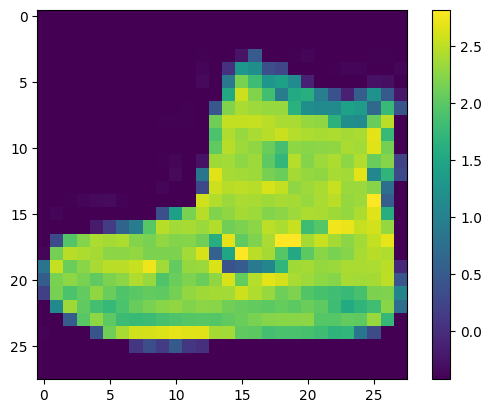

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_dataset[0][0].reshape(28, 28, 1))
plt.colorbar()
plt.show()

In [43]:
label_names[train_dataset[0][1]]

'Ankle boot'

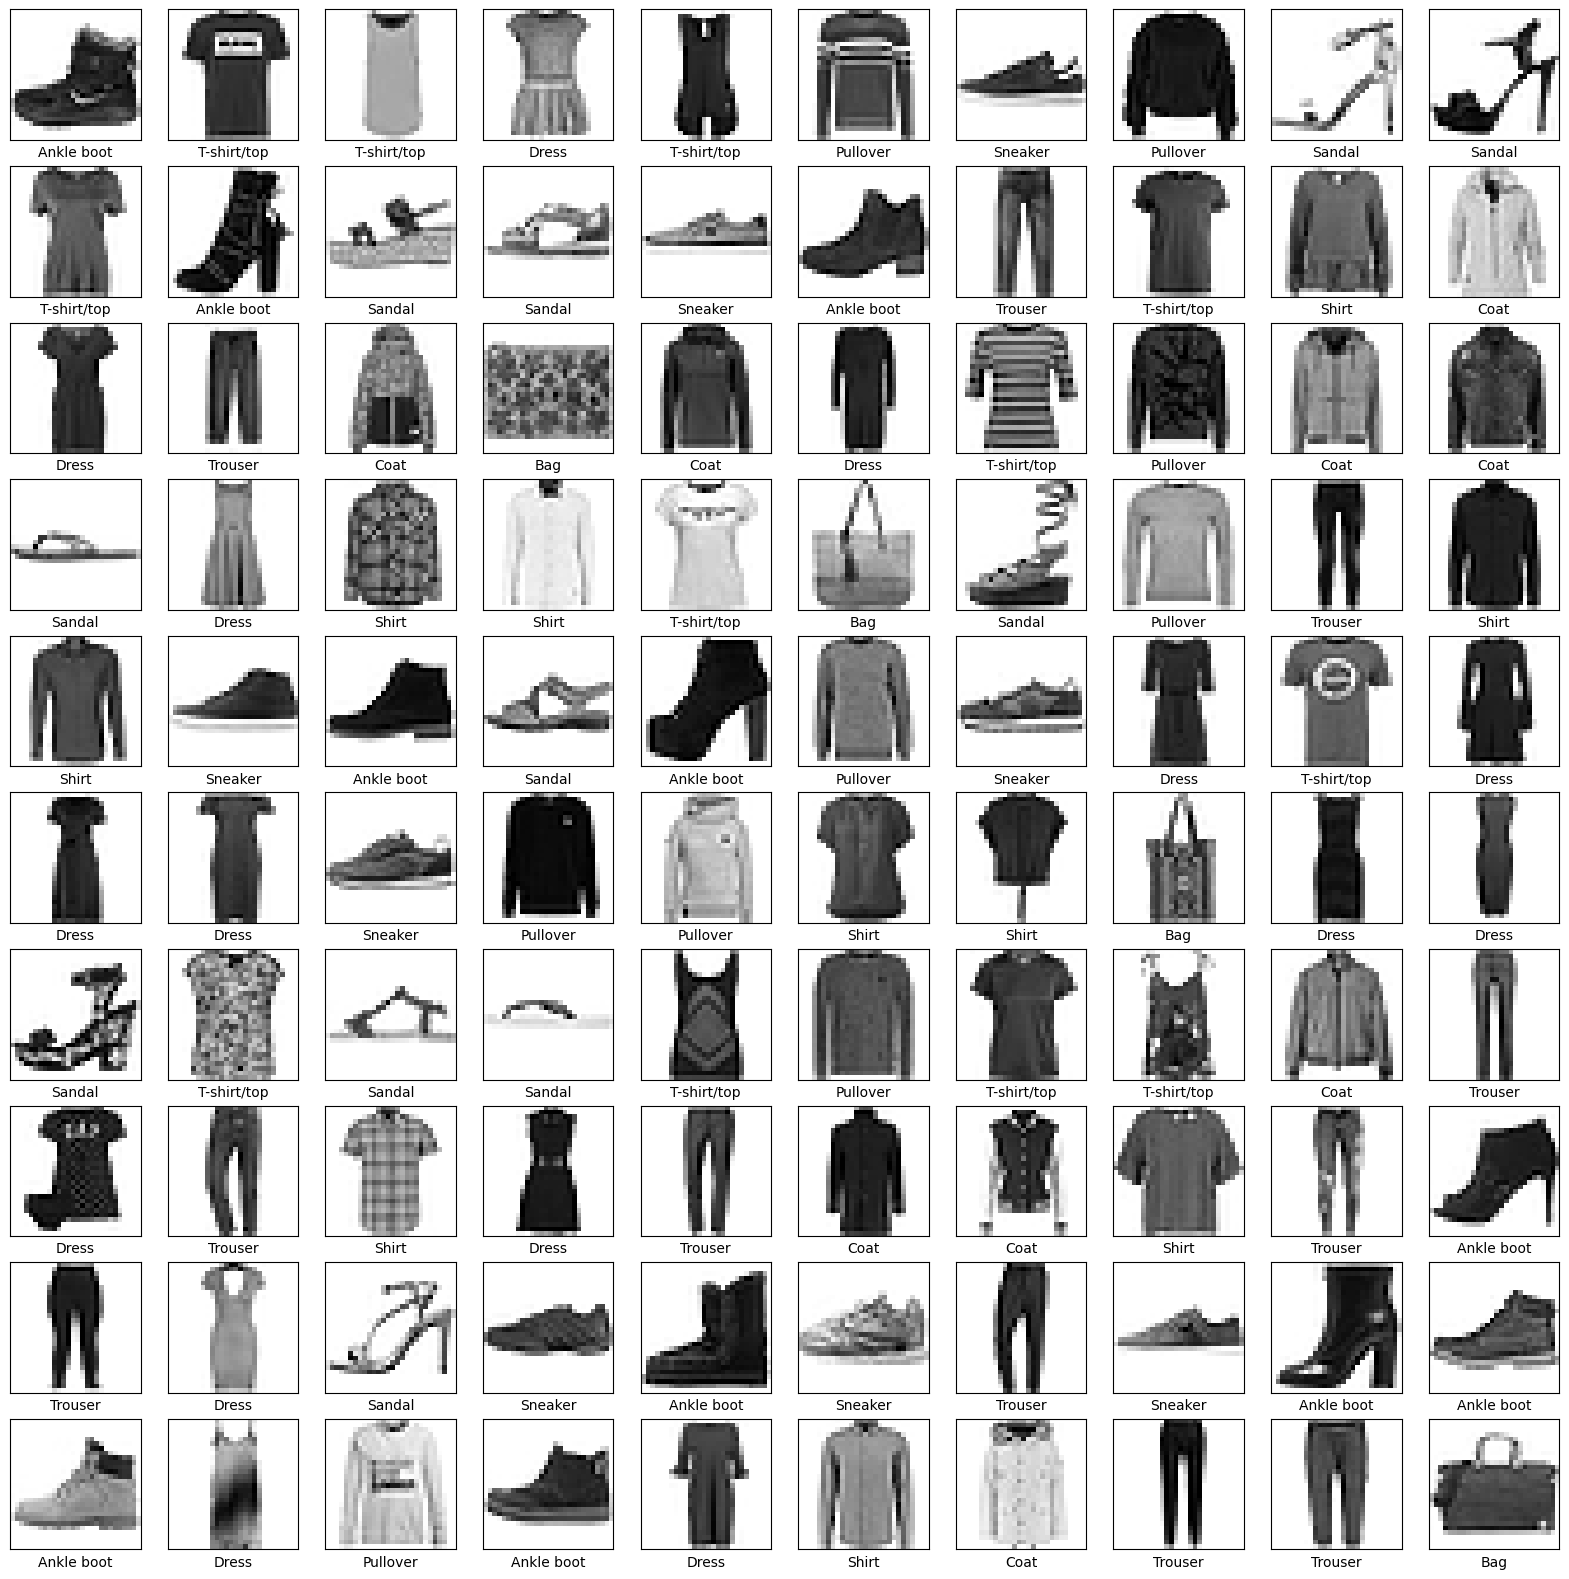

In [44]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_dataset[i][0].reshape(28, 28, 1), cmap=plt.cm.binary)
    plt.xlabel(label_names[train_dataset[i][1]])
plt.show()

### 모델 구축

In [58]:
# 기본 모델 = 완전연결계층 = Linear
class MyFirstModel(nn.Module):
    def __init__(self):
        super(MyFirstModel, self).__init__()

        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 10),
            nn.Softmax()  # CrossEntropyLoss에서 softmax 처리를 해주기 때문
        )

    def forward(self, x):
        output = self.model(x)
        return output

model = MyFirstModel()

In [59]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss().cuda()    # GPU로 이동
# nn.BCELoss(): BinaryCrossEntropyLoss (2진 분류)

optimizer = optim.AdamW(model.parameters(), lr=1.0)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

In [60]:
epochs = 10
dry_run = False # 1 배치만 훈련

for epoch in range(1, epochs+1):
    # 학습
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break

    # 테스트
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    scheduler.step()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Train Epoch: 1 [0/60000 (0%)]	Loss: -0.101593
Train Epoch: 1 [3200/60000 (5%)]	Loss: -0.125000
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.125000
Train Epoch: 1 [9600/60000 (16%)]	Loss: -0.125000
Train Epoch: 1 [12800/60000 (21%)]	Loss: -0.093750
Train Epoch: 1 [16000/60000 (27%)]	Loss: -0.062500
Train Epoch: 1 [19200/60000 (32%)]	Loss: -0.031250
Train Epoch: 1 [22400/60000 (37%)]	Loss: -0.062500
Train Epoch: 1 [25600/60000 (43%)]	Loss: -0.062500
Train Epoch: 1 [28800/60000 (48%)]	Loss: -0.156250
Train Epoch: 1 [32000/60000 (53%)]	Loss: -0.062500
Train Epoch: 1 [35200/60000 (59%)]	Loss: -0.187500
Train Epoch: 1 [38400/60000 (64%)]	Loss: -0.093750
Train Epoch: 1 [41600/60000 (69%)]	Loss: -0.218750
Train Epoch: 1 [44800/60000 (75%)]	Loss: -0.062500
Train Epoch: 1 [48000/60000 (80%)]	Loss: -0.125000
Train Epoch: 1 [51200/60000 (85%)]	Loss: -0.125000
Train Epoch: 1 [54400/60000 (91%)]	Loss: -0.062500
Train Epoch: 1 [57600/60000 (96%)]	Loss: -0.156250

Test set: Average loss: -0.0980, Accura